## Data Prep

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tric = pd.read_excel('OCRDS formatted rev1.xlsx', sheet_name='tric')
tic = pd.read_excel('OCRDS formatted rev1.xlsx', sheet_name='tic')
exco = pd.read_excel('OCRDS formatted rev1.xlsx', sheet_name='exco')
hrd = pd.read_excel('OCRDS formatted rev1.xlsx', sheet_name='hrd')
bfrb = pd.read_excel('OCRDS formatted rev1.xlsx', sheet_name='bfrb')

In [ ]:
# Show number of rows in each subset
shapes = [(tric.shape), (tic.shape), (exco.shape), (hrd.shape), (bfrb.shape)]
[i[0] for i in shapes]

[1541, 340, 1419, 555, 557]

In [ ]:
tric_nn = tric.copy()
tric_nn.dropna(inplace=True)
tic_nn = tic.copy()
tic_nn.dropna(inplace=True)
exco_nn = exco.copy()
exco_nn.dropna(inplace=True)
hrd_nn = hrd.copy()
hrd_nn.dropna(inplace=True)
bfrb_nn = bfrb.copy()
bfrb_nn.dropna(inplace=True)

In [ ]:
# Show number of rows in each subset after removing rows with missing data
shapes = [(tric_nn.shape), (tic_nn.shape), (exco_nn.shape), (hrd_nn.shape), (bfrb_nn.shape)]
[i[0] for i in shapes]

[721, 58, 698, 252, 58]

In [ ]:
# N getting a bit low for some (tic and bfrb especially)
# I also checked BFRB and each subtype in there is coupled together so I didn't unnecessarily cut patients with one and not other scores
# I did check HRD (includes CIR) and found that scores weren't always coupled, so for hrd subset I'll remove missingness per column of interest (don't use hrd_nn)


## Create 3 severity groups for each score:
* Note: All ages grouped currently



In [ ]:
# Starting with just one as a test run, trichotillomania
print(tric_nn['bfrd_hair'].min(),tric_nn['bfrd_hair'].max())

0.0 12.0


In [ ]:
# 3 item scale out of 4, scores range from 0-12
# 0-3 = "None or Borderline to Mild"
# 4-8 = "Moderate to Marked"
# 9-12 = "Severe to Extreme"

# New column 'tric_severity'
tric_nn['tric_severity'] = tric_nn['bfrd_hair'].apply(lambda x: "None or Borderline to Mild" if 0 <= x < 4 else "Moderate to Marked" if 4 <= x < 9 else "Severe to Extreme")

<Figure size 800x600 with 0 Axes>

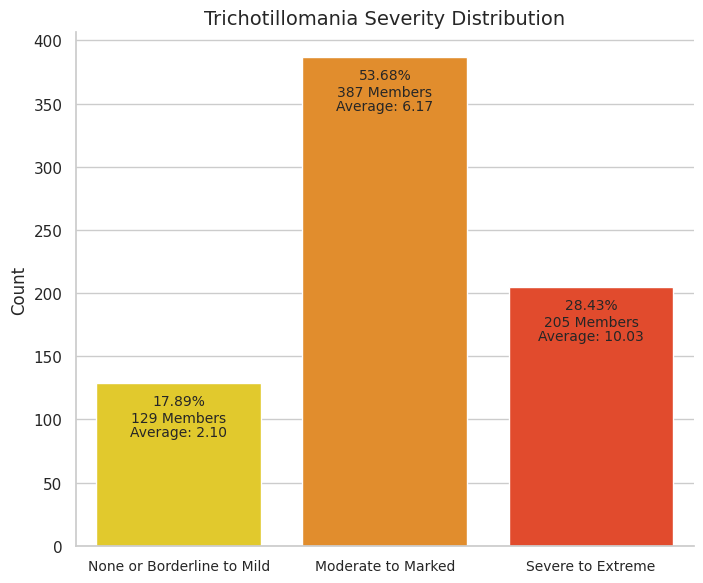

In [ ]:
category_order = ["None or Borderline to Mild", "Moderate to Marked", "Severe to Extreme"]

# Plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Define custom colors for each category
colors = ["#ffdf0f", "#ff8f0f", "#ff370f"]

# Create the histogram plot with specified order and palette
g = sns.catplot(data=tric_nn, x="tric_severity", kind="count", order=category_order, palette=colors, height=6, aspect=1.2)

# Access the underlying Axes object
ax = g.ax

# Format x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), wrap=True, fontsize=10)

# Calculate and add data labels
total_samples = len(tric_nn["tric_severity"])
value_counts = tric_nn["tric_severity"].value_counts()
for p, category in zip(ax.patches, category_order):
    height = p.get_height()
    ax.annotate(f"{height/total_samples:.2%}", (p.get_x() + p.get_width() / 2, height -20),
                ha="center", va="bottom", fontsize=10)

    # Additional labels with value count
    count = value_counts.get(category, 0)
    offset = -20  # Adjust the offset as needed
    ax.annotate((f"{count}" " Members"), (p.get_x() + p.get_width() / 2, height),
                xytext=(0, offset), textcoords='offset points',
                ha="center", va="top", fontsize=10)

    # Additional label with average value
    average_value = tric_nn.loc[tric_nn["tric_severity"] == category, "bfrd_hair"].mean()
    ax.annotate(f"Average: {average_value:.2f}", (p.get_x() + p.get_width() / 2, height +5),
                xytext=(0, offset - 15), textcoords='offset points',
                ha="center", va="top", fontsize=10)

# Set plot title and labels
ax.set_title("Trichotillomania Severity Distribution", fontsize=14)
ax.set_ylabel("Count")
ax.set_xlabel("")

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
testdf = tric_nn[(tric_nn['assessment_num'] == 1) & (tric_nn['bfrd_hair'] < 4)]
#testdf

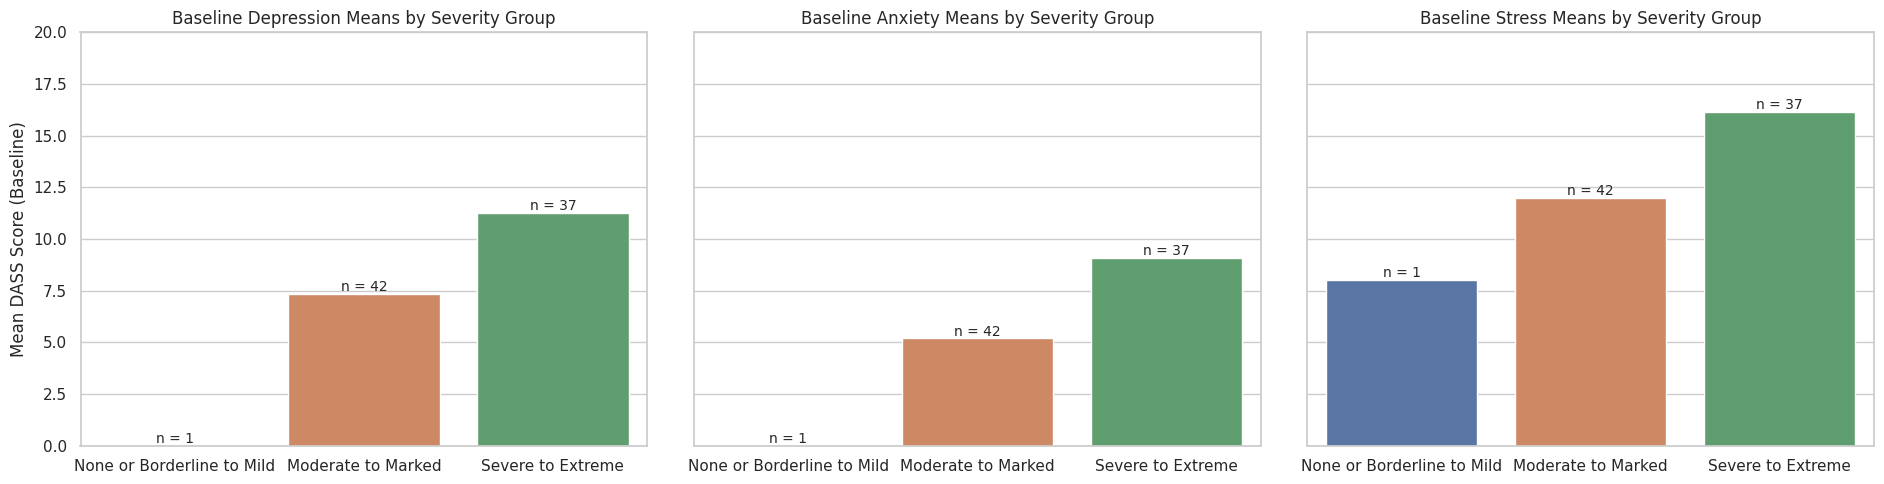

In [ ]:
# Filter the DataFrame based on 'assessment_num' = 1
filtered_df = tric_nn[tric_nn['assessment_num'] == 1]

# Calculate the mean 'dass_depression' and 'dass_anxiety' for each category in 'bfrd_hair'
mean_depression_scores = filtered_df.groupby('tric_severity')['dass_depression'].mean()
mean_anxiety_scores = filtered_df.groupby('tric_severity')['dass_anxiety'].mean()
mean_stress_scores = filtered_df.groupby('tric_severity')['dass_stress'].mean()

# Create subplots with shared y-axis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(19, 5), sharey=True)

# Plot the mean 'dass_depression' using a bar plot
sns.barplot(x=mean_depression_scores.index, y=mean_depression_scores.values, order=category_order, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Mean DASS Score (Baseline)')
ax1.set_title('Baseline Depression Means by Severity Group')

# Add value counts as text annotations for depression
total_samples = len(filtered_df)
value_counts_depression = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax1.patches, category_order):
    height = p.get_height()
    count = value_counts_depression.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax1.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Plot the mean 'dass_anxiety' using a bar plot
sns.barplot(x=mean_anxiety_scores.index, y=mean_anxiety_scores.values, order=category_order, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Baseline Anxiety Means by Severity Group')

# Add value counts as text annotations for anxiety
value_counts_anxiety = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax2.patches, category_order):
    height = p.get_height()
    count = value_counts_anxiety.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax2.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Plot the mean 'dass_stress' using a bar plot
sns.barplot(x=mean_stress_scores.index, y=mean_stress_scores.values, order=category_order, ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_title('Baseline Stress Means by Severity Group')

# Add value counts as text annotations for stress
value_counts_stress = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax3.patches, category_order):
    height = p.get_height()
    count = value_counts_stress.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax3.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Set the y-axis range for both plots
ax1.set_ylim(0, 20)

plt.tight_layout()
plt.show()


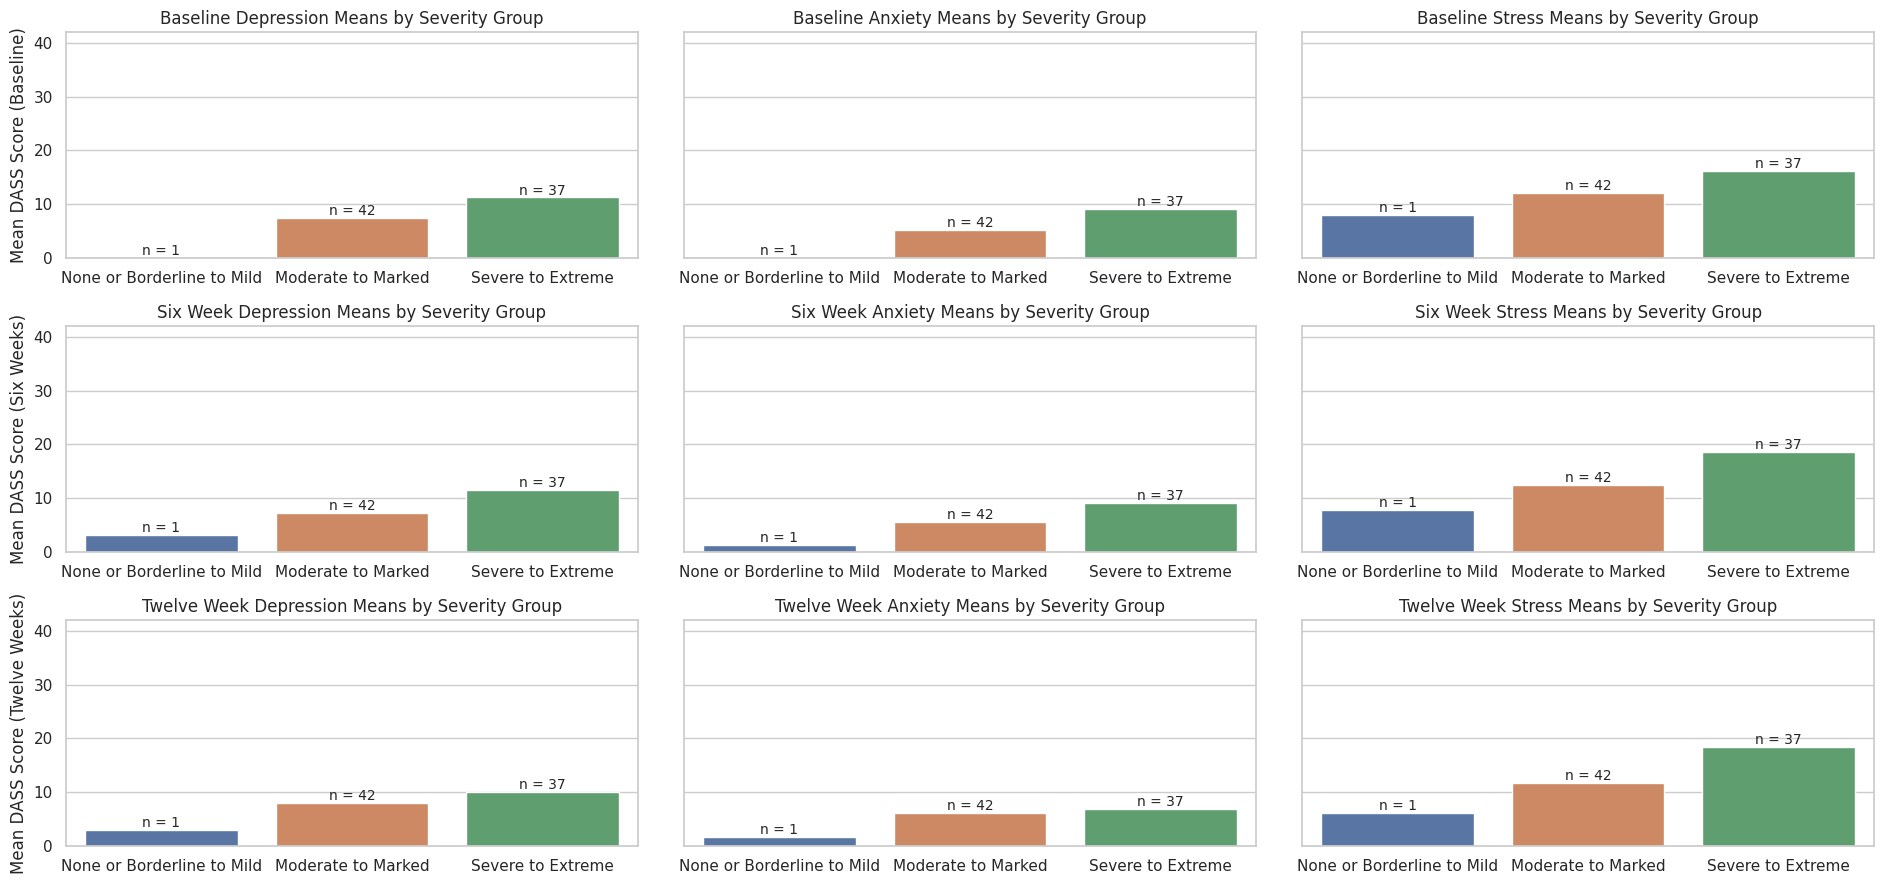

In [ ]:
# Filter the DataFrame based on 'assessment_num' = 1
filtered_df = tric_nn[tric_nn['assessment_num'] == 1]
six_week_df = tric_nn[tric_nn['assessment_num'] == 3]
twelve_week_df = tric_nn[tric_nn['assessment_num'] == 5]

# Calculate the mean 'dass_depression' and 'dass_anxiety' for each category in 'bfrd_hair'
mean_depression_scores = filtered_df.groupby('tric_severity')['dass_depression'].mean()
mean_anxiety_scores = filtered_df.groupby('tric_severity')['dass_anxiety'].mean()
mean_stress_scores = filtered_df.groupby('tric_severity')['dass_stress'].mean()

mean6w_depression_scores = six_week_df.groupby('tric_severity')['dass_depression'].mean()
mean6w_anxiety_scores = six_week_df.groupby('tric_severity')['dass_anxiety'].mean()
mean6w_stress_scores = six_week_df.groupby('tric_severity')['dass_stress'].mean()

mean12w_depression_scores = twelve_week_df.groupby('tric_severity')['dass_depression'].mean()
mean12w_anxiety_scores = twelve_week_df.groupby('tric_severity')['dass_anxiety'].mean()
mean12w_stress_scores = twelve_week_df.groupby('tric_severity')['dass_stress'].mean()

# Create subplots with shared y-axis
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(19, 9), sharey=True)

# Plot the mean 'dass_depression' using a bar plot
sns.barplot(x=mean_depression_scores.index, y=mean_depression_scores.values, order=category_order, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Mean DASS Score (Baseline)')
ax1.set_title('Baseline Depression Means by Severity Group')

# Add value counts as text annotations for depression
total_samples = len(filtered_df)
value_counts_depression = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax1.patches, category_order):
    height = p.get_height()
    count = value_counts_depression.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax1.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Plot the mean 'dass_anxiety' using a bar plot
sns.barplot(x=mean_anxiety_scores.index, y=mean_anxiety_scores.values, order=category_order, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Baseline Anxiety Means by Severity Group')

# Add value counts as text annotations for anxiety
value_counts_anxiety = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax2.patches, category_order):
    height = p.get_height()
    count = value_counts_anxiety.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax2.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Plot the mean 'dass_stress' using a bar plot
sns.barplot(x=mean_stress_scores.index, y=mean_stress_scores.values, order=category_order, ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_title('Baseline Stress Means by Severity Group')

# Add value counts as text annotations for stress
value_counts_stress = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax3.patches, category_order):
    height = p.get_height()
    count = value_counts_stress.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax3.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Plot the mean 'dass_depression' using a bar plot
sns.barplot(x=mean6w_depression_scores.index, y=mean6w_depression_scores.values, order=category_order, ax=ax4)
ax4.set_xlabel('')
ax4.set_ylabel('Mean DASS Score (Six Weeks)')
ax4.set_title('Six Week Depression Means by Severity Group')

# Add value counts as text annotations for depression
total_samples = len(filtered_df)
value_counts_depression = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax4.patches, category_order):
    height = p.get_height()
    count = value_counts_depression.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax4.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Plot the mean 'dass_anxiety' using a bar plot
sns.barplot(x=mean6w_anxiety_scores.index, y=mean6w_anxiety_scores.values, order=category_order, ax=ax5)
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.set_title('Six Week Anxiety Means by Severity Group')

# Add value counts as text annotations for anxiety
value_counts_anxiety = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax5.patches, category_order):
    height = p.get_height()
    count = value_counts_anxiety.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax5.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Plot the mean 'dass_stress' using a bar plot
sns.barplot(x=mean6w_stress_scores.index, y=mean6w_stress_scores.values, order=category_order, ax=ax6)
ax6.set_xlabel('')
ax6.set_ylabel('')
ax6.set_title('Six Week Stress Means by Severity Group')

# Add value counts as text annotations for stress
value_counts_stress = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax6.patches, category_order):
    height = p.get_height()
    count = value_counts_stress.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax6.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Plot the mean 'dass_depression' using a bar plot
sns.barplot(x=mean12w_depression_scores.index, y=mean12w_depression_scores.values, order=category_order, ax=ax7)
ax7.set_xlabel('')
ax7.set_ylabel('Mean DASS Score (Twelve Weeks)')
ax7.set_title('Twelve Week Depression Means by Severity Group')

# Add value counts as text annotations for depression
total_samples = len(filtered_df)
value_counts_depression = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax7.patches, category_order):
    height = p.get_height()
    count = value_counts_depression.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax7.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Plot the mean 'dass_anxiety' using a bar plot
sns.barplot(x=mean12w_anxiety_scores.index, y=mean12w_anxiety_scores.values, order=category_order, ax=ax8)
ax8.set_xlabel('')
ax8.set_ylabel('')
ax8.set_title('Twelve Week Anxiety Means by Severity Group')

# Add value counts as text annotations for anxiety
value_counts_anxiety = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax8.patches, category_order):
    height = p.get_height()
    count = value_counts_anxiety.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax8.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Plot the mean 'dass_stress' using a bar plot
sns.barplot(x=mean12w_stress_scores.index, y=mean12w_stress_scores.values, order=category_order, ax=ax9)
ax9.set_xlabel('')
ax9.set_ylabel('')
ax9.set_title('Twelve Week Stress Means by Severity Group')

# Add value counts as text annotations for stress
value_counts_stress = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax9.patches, category_order):
    height = p.get_height()
    count = value_counts_stress.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax9.annotate(f"n = {count}", (p.get_x() + p.get_width() / 2, height),
                 xytext=(0, offset), textcoords='offset points',
                 ha="center", va="center", fontsize=10)

# Set the y-axis range for both plots
ax1.set_ylim(0, 42)

plt.tight_layout()
plt.show()

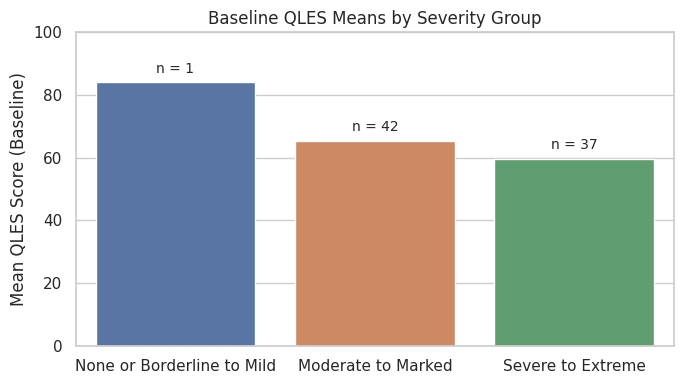

In [ ]:
filtered_df = tric_nn[tric_nn['assessment_num'] == 1]

mean_scores = filtered_df.groupby('tric_severity')['qles_total'].mean()

plt.figure(figsize=(7, 4))
ax = sns.barplot(x=mean_scores.index, y=mean_scores.values, order=category_order)
plt.xlabel('')
plt.ylabel('Mean QLES Score (Baseline)')
plt.title('Baseline QLES Means by Severity Group')

# Add value counts as text annotations
total_samples = len(filtered_df)
value_counts = filtered_df['tric_severity'].value_counts()
for p, category in zip(ax.patches, category_order):
    height = p.get_height()
    count = value_counts.get(category, 0)
    offset = 5  # Adjust the offset as needed
    ax.annotate(("n = "f"{count}"), (p.get_x() + p.get_width() / 2, height),
                xytext=(0, offset), textcoords='offset points',
                ha="center", va="bottom", fontsize=10)

# Set the y-axis range
plt.ylim(0, 100)  # Adjust the range as needed

plt.tight_layout()
plt.show()